# Data Aggregation and Group Operations

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
pd.options.display.notebook_repr_html = False

In [3]:
%matplotlib inline

## GroupBy Mechanics

In [4]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [5]:
grouped = df['data1'].groupby(df['key1'])
grouped 

In [6]:
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [7]:
#meanof grouping data1 bykey1key2
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [8]:
#pisahin mz
means.unstack()

key2       one       two
key1                    
a     0.880536  0.478943
b    -0.519439 -0.555730

In [9]:
buah = np.array(['Pisang','Nangka','Nangka','Pisang','Pisang'])
massa = np.array([300,500,250,300,700])
df['data1'].groupby([buah, massa]).mean()

Nangka  250   -0.519439
        500    0.478943
Pisang  300   -0.380219
        700    1.965781
Name: data1, dtype: float64

In [10]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [11]:
df.groupby(['key1','key2']).mean()

              data1     data2
key1 key2                    
a    one   0.880536  1.319920
     two   0.478943  0.092908
b    one  -0.519439  0.281746
     two  -0.555730  0.769023

In [12]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating Over Groups

In [13]:
for name, group in df.groupby('key1'):
    print name
    print group

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [14]:
for (k1, k2), group in df.groupby(['key1','key2']):
    print k1, k2
    print group

a one
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
a two
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
b one
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
b two
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [15]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two

In [16]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [17]:
grouped = df.groupby(df.dtypes,axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a Column or Subset of Columns

In [18]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [19]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [20]:
df.groupby(['key1','key2'])[['data2']].mean()

              data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [21]:
s_grouped = df.groupby(['key1','key2'])['data2']
s_grouped

In [22]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with Dicts and Series

In [23]:
kewan = DataFrame(np.random.randn(5,5),
                  columns =['a','b','c','d','e'],
                  index= ['Cangcorang','Laba-laba','Trenggiling','Kucing','Waung'])

In [24]:
kewan.ix[2:3,['b','c']] = np.nan #missing values adding

In [25]:
kewan

                    a         b         c         d         e
Cangcorang   1.007189 -1.296221  0.274992  0.228913  1.352917
Laba-laba    0.886429 -2.001637 -0.371843  1.669025 -0.438570
Trenggiling -0.539741       NaN       NaN -1.021228 -0.577087
Kucing       0.124121  0.302614  0.523772  0.000940  1.343810
Waung       -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [26]:
mapping = {'a': 'ijo',
          'b': 'kuning',
          'c': 'abang',
          'd': 'jambon',
          'e': 'petengan',
          'f': 'warna-warni'}

In [27]:
by_column = kewan.groupby(mapping,axis=1)
by_column.sum()

                abang       ijo    jambon    kuning  petengan
Cangcorang   0.274992  1.007189  0.228913 -1.296221  1.352917
Laba-laba   -0.371843  0.886429  1.669025 -2.001637 -0.438570
Trenggiling       NaN -0.539741 -1.021228       NaN -0.577087
Kucing       0.523772  0.124121  0.000940  0.302614  1.343810
Waung       -2.370232 -0.713544 -1.860761 -0.831154 -0.860757

### Grouping with Functions

In [28]:
kewan.groupby(len).sum()

           a         b         c         d         e
5  -0.713544 -0.831154 -2.370232 -1.860761 -0.860757
6   0.124121  0.302614  0.523772  0.000940  1.343810
9   0.886429 -2.001637 -0.371843  1.669025 -0.438570
10  1.007189 -1.296221  0.274992  0.228913  1.352917
11 -0.539741       NaN       NaN -1.021228 -0.577087

In [29]:
key_list = ['siji','siji','siji','loro','loro']
kewan.groupby([len,key_list]).min()

                a         b         c         d         e
5  loro -0.713544 -0.831154 -2.370232 -1.860761 -0.860757
6  loro  0.124121  0.302614  0.523772  0.000940  1.343810
9  siji  0.886429 -2.001637 -0.371843  1.669025 -0.438570
10 siji  1.007189 -1.296221  0.274992  0.228913  1.352917
11 siji -0.539741       NaN       NaN -1.021228 -0.577087

### Grouping by index levels

In [30]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [31]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data Aggregation 

In [32]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [33]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [34]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

         data1     data2
key1                    
a     2.170488  1.300498
b     0.036292  0.487276

In [35]:
grouped.describe()

               data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.746672  0.910916
     std    1.109736  0.712217
     min   -0.204708  0.092908
     25%    0.137118  0.669671
     50%    0.478943  1.246435
     75%    1.222362  1.319920
     max    1.965781  1.393406
b    count  2.000000  2.000000
     mean  -0.537585  0.525384
     std    0.025662  0.344556
     min   -0.555730  0.281746
     25%   -0.546657  0.403565
     50%   -0.537585  0.525384
     75%   -0.528512  0.647203
     max   -0.519439  0.769023

In [36]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

In [37]:
### column-wise and multiple function applicaation
grouped = tips.groupby(['sex','smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [38]:
grouped_pct.agg(['mean','std',peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [39]:
grouped_pct.agg([('kacang','mean'),('bar',np.std)])

                 kacang       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [40]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [41]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [42]:
ftuples=[('rata2','mean'),('variansi',np.var)]
grouped['tip_pct','total_bill'].agg(ftuples)

                tip_pct           total_bill           
                  rata2  variansi      rata2   variansi
sex    smoker                                          
Female No      0.156921  0.001327  18.105185  53.092422
       Yes     0.182150  0.005126  17.977879  84.451517
Male   No      0.160669  0.001751  19.791237  76.152961
       Yes     0.152771  0.008206  22.284500  98.244673

In [43]:
grouped.agg({'tip' : np.max, 'size': 'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [44]:
grouped.agg({'tip_pct':['min','max','mean','std'],
            'size' : 'sum'})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### Returning Aggregated Data in unindexed form

In [45]:
tips.groupby(['sex','smoker'], as_index=False).mean()

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

## Group-wise Operations and Transformations

In [46]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [47]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       0.746672    0.910916
b      -0.537585    0.525384

In [48]:
pd.merge(df,k1_means,left_on='key1', right_index=True)

      data1     data2 key1 key2  mean_data1  mean_data2
0 -0.204708  1.393406    a  one    0.746672    0.910916
1  0.478943  0.092908    a  two    0.746672    0.910916
4  1.965781  1.246435    a  one    0.746672    0.910916
2 -0.519439  0.281746    b  one   -0.537585    0.525384
3 -0.555730  0.769023    b  two   -0.537585    0.525384

In [49]:
key = ['siji','loro','siji','loro','siji']
kewan.groupby(key).mean()

             a         b         c         d         e
loro  0.505275 -0.849512  0.075965  0.834983  0.452620
siji -0.082032 -1.063687 -1.047620 -0.884358 -0.028309

In [50]:
kewan.groupby(key).transform(np.mean)

                    a         b         c         d         e
Cangcorang  -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Laba-laba    0.505275 -0.849512  0.075965  0.834983  0.452620
Trenggiling -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Kucing       0.505275 -0.849512  0.075965  0.834983  0.452620
Waung       -0.082032 -1.063687 -1.047620 -0.884358 -0.028309

In [51]:
def demean(arr):
    return arr-arr.mean()
demeaned = kewan.groupby(key).transform(demean)
demeaned

                    a         b         c         d         e
Cangcorang   1.089221 -0.232534  1.322612  1.113271  1.381226
Laba-laba    0.381154 -1.152125 -0.447807  0.834043 -0.891190
Trenggiling -0.457709       NaN       NaN -0.136869 -0.548778
Kucing      -0.381154  1.152125  0.447807 -0.834043  0.891190
Waung       -0.631512  0.232534 -1.322612 -0.976402 -0.832448

In [52]:
demeaned.groupby(key).mean()

                 a             b    c             d    e
loro -2.775558e-17  0.000000e+00  0.0  0.000000e+00  0.0
siji  0.000000e+00 -1.110223e-16  0.0  7.401487e-17  0.0

### Apply : General split-apply-combine

In [53]:
def top(df, n=5, column ='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [54]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [55]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [56]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [57]:
result.unstack('smoker')

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [58]:
f = lambda x: x.describe()
grouped.apply(f)

                     total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.

#### Supressing the group keys

In [59]:
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

In [60]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

0     (-1.23, 0.489]
1    (-2.956, -1.23]
2     (-1.23, 0.489]
3     (0.489, 2.208]
4     (-1.23, 0.489]
5     (0.489, 2.208]
6     (-1.23, 0.489]
7     (-1.23, 0.489]
8     (0.489, 2.208]
9     (0.489, 2.208]
Name: data1, dtype: category
Categories (4, object): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [61]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()


                 count       max      mean       min
data1                                               
(-2.956, -1.23]   95.0  1.670835 -0.039521 -3.399312
(-1.23, 0.489]   598.0  3.260383 -0.002051 -2.989741
(0.489, 2.208]   297.0  2.954439  0.081822 -3.745356
(2.208, 3.928]    10.0  1.765640  0.024750 -1.929776

In [62]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  1.670835 -0.049902 -3.399312
1      100.0  2.628441  0.030989 -1.950098
2      100.0  2.527939 -0.067179 -2.925113
3      100.0  3.260383  0.065713 -2.315555
4      100.0  2.074345 -0.111653 -2.047939
5      100.0  2.184810  0.052130 -2.989741
6      100.0  2.458842 -0.021489 -2.223506
7      100.0  2.954439 -0.026459 -3.056990
8      100.0  2.735527  0.103406 -3.745356
9      100.0  2.377020  0.220122 -2.064111

### Filling missing values with group specific values

In [63]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.125921
2         NaN
3   -0.884475
4         NaN
5    0.227290
dtype: float64

In [64]:
s.fillna(s.mean())

0   -0.261035
1   -0.125921
2   -0.261035
3   -0.884475
4   -0.261035
5    0.227290
dtype: float64

In [65]:
kutha = ['solo','jogja','salatiga', 'semarang', 'jepara', 'purwodadi', 'cilacap','pekalongan']
group_key = ['East']*4 + ['West']*4
data = Series(np.random.randn(8), index=kutha)
data[['jogja','solo','cilacap']] = np.nan
data

solo               NaN
jogja              NaN
salatiga     -0.365757
semarang     -0.375842
jepara        0.329939
purwodadi     0.981994
cilacap            NaN
pekalongan   -1.613716
dtype: float64

In [66]:
data.groupby(group_key).mean()

East   -0.370799
West   -0.100594
dtype: float64

In [67]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

solo         -0.370799
jogja        -0.370799
salatiga     -0.365757
semarang     -0.375842
jepara        0.329939
purwodadi     0.981994
cilacap      -0.100594
pekalongan   -1.613716
dtype: float64

In [68]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

solo          0.500000
jogja         0.500000
salatiga     -0.365757
semarang     -0.375842
jepara        0.329939
purwodadi     0.981994
cilacap      -1.000000
pekalongan   -1.613716
dtype: float64

### Random Sampling and Permutation

In [69]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [70]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

AD     1
8C     8
5H     5
KC    10
2C     2
dtype: int64

In [71]:
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw,n=2)

C  2C     2
   3C     3
D  KD    10
   8D     8
H  KH    10
   3H     3
S  2S     2
   4S     4
dtype: int64

In [72]:
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

KC    10
JC    10
AD     1
5D     5
5H     5
6H     6
7S     7
KS    10
dtype: int64

### Group weighted average and correlation

In [73]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

  category      data   weights
0        a  1.561587  0.957515
1        a  1.219984  0.347267
2        a -0.482239  0.581362
3        a  0.315667  0.217091
4        b -0.047852  0.894406
5        b -0.454145  0.918564
6        b -0.556774  0.277825
7        b  0.253321  0.955905

In [74]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.811643
b   -0.122262
dtype: float64

In [75]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px[:10]

            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93
2003-01-09  7.34  21.93  29.44  927.57
2003-01-10  7.36  21.97  29.03  927.57
2003-01-13  7.32  22.16  28.91  926.26
2003-01-14  7.30  22.39  29.17  931.66
2003-01-15  7.22  22.11  28.77  918.22

In [76]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [77]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x:x.year)
by_year.apply(spx_corr)

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [78]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Group Wise Linear Regression

In [79]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y,X).fit()
    return result.params
by_year.apply(regress,'AAPL',['SPX'])

           SPX  intercept
2003  1.195406   0.000710
2004  1.363463   0.004201
2005  1.766415   0.003246
2006  1.645496   0.000080
2007  1.198761   0.003438
2008  0.968016  -0.001110
2009  0.879103   0.002954
2010  1.052608   0.001261
2011  0.806605   0.001514

## Pivot tables and cross tabulation

In [80]:
tips.pivot_table(index=['sex','smoker'])

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [81]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'], columns='smoker')

              tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

In [82]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'], columns='smoker', margins=True)

              tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [83]:
tips.pivot_table('tip_pct',index=['sex','smoker'], columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [84]:
tips.pivot_table('size',index=['time','sex','smoker'], columns='day', aggfunc=sum, fill_value=0, margins=True)

day                    Fri    Sat    Sun   Thur    All
time   sex    smoker                                  
Dinner Female No       2.0   30.0   43.0    2.0   77.0
              Yes      8.0   33.0   10.0    0.0   51.0
       Male   No       4.0   85.0  124.0    0.0  213.0
              Yes     12.0   71.0   39.0    0.0  122.0
Lunch  Female No       3.0    0.0    0.0   60.0   63.0
              Yes      6.0    0.0    0.0   17.0   23.0
       Male   No       0.0    0.0    0.0   50.0   50.0
              Yes      5.0    0.0    0.0   23.0   28.0
All                   40.0  219.0  216.0  152.0  627.0

### Cross Tabulations xtab

In [85]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [86]:
data

   Sample  Gender    Handedness
0       1  Female  Right-handed
1       2    Male   Left-handed
2       3  Female  Right-handed
3       4    Male  Right-handed
4       5    Male   Left-handed
5       6    Male  Right-handed
6       7  Female  Right-handed
7       8  Female   Left-handed
8       9    Male  Right-handed
9      10  Female  Right-handed

In [87]:
pd.crosstab(data['Gender'],data['Handedness'], margins=True)

Handedness  Left-handed  Right-handed  All
Gender                                    
Female                1             4    5
Male                  2             3    5
All                   3             7   10

In [88]:
pd.crosstab([tips['time'],tips['day']], tips['smoker'], margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## us election

In [89]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')
fec.info()

C:\Users\znsvs\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [90]:
fec.ix[5]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm                BECKMAN, JAMES
contbr_city                  SPRINGDALE
contbr_st                            AR
contbr_zip                  7.27647e+08
contbr_employer                    NONE
contbr_occupation               RETIRED
contb_receipt_amt                   500
contb_receipt_dt              23-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 5, dtype: object

In [91]:
unique_cands=fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [92]:
#using dict to indicate party affiliation
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [93]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [94]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [95]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [96]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [97]:
fec = fec[fec.contb_receipt_amt>0]

In [98]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo.tail()

          cmte_id    cand_id        cand_nm        contbr_nm contbr_city  \
701381  C00431445  P80003338  Obama, Barack   MOUNTS, ROBERT         APO   
701382  C00431445  P80003338  Obama, Barack  TAITANO, TYRONE     HAGATNA   
701383  C00431445  P80003338  Obama, Barack   TUCKER, PAMELA         APO   
701384  C00431445  P80003338  Obama, Barack   MOUNTS, ROBERT         APO   
701385  C00431445  P80003338  Obama, Barack      NEAL, AMBER         APO   

       contbr_st contbr_zip                         contbr_employer  \
701381        ZZ  962043077                       HQ USFK (FKDC-SA)   
701382        ZZ  969323373                            NOT EMPLOYED   
701383        ZZ  963190030                                   DODEA   
701384        ZZ  962043077                       HQ USFK (FKDC-SA)   
701385        ZZ  091022065  THE DEPARTMENT OF DEFENSE EDUCATION AC   

                            contbr_occupation  contb_receipt_amt  \
701381  GS-15 INTERNATIONAL RELATIONS OFFICER   

### donation statistic occupation and employer

In [99]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [100]:
gqerjao_map ={'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
# If no mapping provided, return x
f = lambda x: gqerjao_map.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [101]:
gqerjae_map ={'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
# If no mapping provided, return x
f = lambda x: gqerjae_map.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [102]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party                 Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2074974.79  4.211041e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
HOMEMAKER           4248875.80  1.363428e+07
INVESTOR             884133.00  2.431769e+06
LAWYER              3160478.87  3.912243e+05
MANAGER              762883.22  1.444532e+06
NOT PROVIDED        4866973.96  2.056547e+07
OWNER               1001567.36  2.408287e+06
PHYSICIAN           3735124.94  3.594320e+06
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06

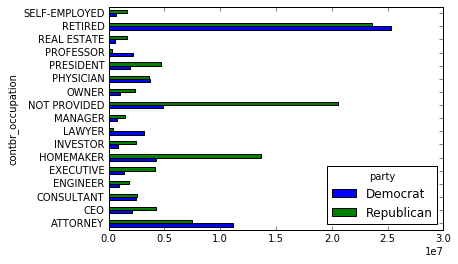

In [103]:
over_2mm.plot(kind='barh')

In [104]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=True)[-n:]
grouped = fec_mrbo.groupby('cand_nm')


In [105]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  CONSULTANT                                 2459912.71
               LAWYER                                     3160478.87
               PHYSICIAN                                  3735124.94
               HOMEMAKER                                  4248875.80
               INFORMATION REQUESTED                      4866973.96
               ATTORNEY                                  11141982.97
               RETIRED                                   25305116.38
Romney, Mitt   C.E.O.                                     1968386.11
               EXECUTIVE                                  2300947.03
               PRESIDENT                                  2491244.89
               ATTORNEY                                   5364718.82
               HOMEMAKER                                  8147446.22
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               RETIRED                           

In [106]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  MICROSOFT                                   215585.36
               VOLUNTEER                                   257104.00
               STUDENT                                     318831.45
               SELF EMPLOYED                               469290.00
               SELF                                       1076531.20
               HOMEMAKER                                  2605408.54
               INFORMATION REQUESTED                      5053480.37
               NOT EMPLOYED                               8586308.70
               SELF-EMPLOYED                             17080985.96
               RETIRED                                   22694358.85
Romney, Mitt   H.I.G. CAPITAL                              139500.00
               BARCLAYS CAPITAL                            162750.00
               GOLDMAN SACH & CO.                          238250.00
               MORGAN STANLEY                    

### bucketing donation amounts

In [107]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [108]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                       493.0          77.0
(1, 10]                    40070.0        3681.0
(10, 100]                 372280.0       31853.0
(100, 1000]               153991.0       43357.0
(1000, 10000]              22284.0       26186.0
(10000, 100000]                2.0           1.0
(100000, 1000000]              3.0           NaN
(1000000, 10000000]            4.0           NaN

In [109]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN

In [110]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000           NaN
(1000000, 10000000]       1.000000           NaN

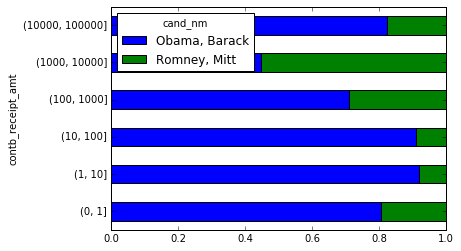

In [111]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### donation statisctics by state

In [112]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

In [113]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583

In [115]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import shapefile
import dbflib
obama = percent['Obama, Barack']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lllat = 21; urlat = 53; lllon = -118; urlon = -62
m = Basemap(ax=ax, projection='stere',
            lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2,
            llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon,
            urcrnrlon=urlon, resolution='l')
m.drawcoastlines()
m.drawcountries()
shp = ShapeFile('statesp020.shp')
dbf = dbflib.open('statesp020.dbf')
for npoly in range(shp.info()[0]):
    # Draw colored polygons on the map
    shpsegs = []
    shp_object = shp.read_object(npoly)
    verts = shp_object.vertices()
    rings = len(verts)
    for ring in range(rings):
        lons, lats = zip(*verts[ring])
        x, y = m(lons, lats)
        shpsegs.append(zip(x,y))
        if ring == 0:
            shapedict = dbf.read_record(npoly)
        name = shapedict['STATE']
    lines = LineCollection(shpsegs,antialiaseds=(1,))
    # state_to_code dict, e.g. 'ALASKA' -> 'AK', omitted
    try:
        per = obama[state_to_code[name.upper()]]
    except KeyError:
        continue
    lines.set_facecolors('k')
    lines.set_alpha(0.75 * per) # Shrink the percentage a bit
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)
plt.show()
#awww sorry

ImportError: No module named dbflib